In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Load & overview dữ liệu**

In [2]:
# Đọc bộ dữ liệu
df = pd.read_csv("../data/CarPricePrediction.csv")

In [3]:
# Xem xét các kiểu dữ liệu của từng thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Màu sắc              2688 non-null   object
 1   Tiêu đề              2688 non-null   object
 2   Chủ                  2688 non-null   object
 3   Phân loại người bán  2688 non-null   object
 4   Địa chỉ              2688 non-null   object
 5   Hãng                 2688 non-null   object
 6   Dòng xe              2688 non-null   object
 7   Năm sản xuất         2688 non-null   int64 
 8   Số Km đã đi          2688 non-null   object
 9   Tình trạng           2688 non-null   object
 10  Hộp số               2688 non-null   object
 11  Nhiên liệu           2688 non-null   object
 12  Kiểu dáng            2688 non-null   object
 13  Số chỗ               2688 non-null   object
 14  Xuất xứ              2688 non-null   object
 15  Chính sách bảo hành  2688 non-null   object
 16  Trọng 

In [4]:
for col in df.columns:
    print(col,' có ',len(df[df[col]=='-']),' dòng chứa giá trị`-`')

Màu sắc  có  0  dòng chứa giá trị`-`
Tiêu đề  có  0  dòng chứa giá trị`-`
Chủ  có  0  dòng chứa giá trị`-`
Phân loại người bán  có  1007  dòng chứa giá trị`-`
Địa chỉ  có  0  dòng chứa giá trị`-`
Hãng  có  0  dòng chứa giá trị`-`
Dòng xe  có  0  dòng chứa giá trị`-`
Năm sản xuất  có  0  dòng chứa giá trị`-`
Số Km đã đi  có  284  dòng chứa giá trị`-`
Tình trạng  có  0  dòng chứa giá trị`-`
Hộp số  có  0  dòng chứa giá trị`-`
Nhiên liệu  có  0  dòng chứa giá trị`-`
Kiểu dáng  có  366  dòng chứa giá trị`-`
Số chỗ  có  311  dòng chứa giá trị`-`
Xuất xứ  có  0  dòng chứa giá trị`-`
Chính sách bảo hành  có  0  dòng chứa giá trị`-`
Trọng lượng  có  0  dòng chứa giá trị`-`
Trọng tải  có  0  dòng chứa giá trị`-`
Giá  có  3  dòng chứa giá trị`-`
Đối tác  có  0  dòng chứa giá trị`-`
href  có  0  dòng chứa giá trị`-`


In [5]:
#Loại bỏ các dòng dữ liệu mà df['Giá']='-'
df = df[df['Giá'] != '-']

In [6]:
#Chuyển đổi format của giá từ 200.000.000đ thành 200000000 rồi đổi sang kiểu số nguyên
df['Giá'] = df['Giá'].replace('[\.,đ]', '', regex=True).astype(int)

In [7]:
#Liệt kê các thuộc tính trong dataframe
df_columns = df.columns
df_columns

Index(['Màu sắc', 'Tiêu đề', 'Chủ', 'Phân loại người bán', 'Địa chỉ', 'Hãng',
       'Dòng xe', 'Năm sản xuất', 'Số Km đã đi', 'Tình trạng', 'Hộp số',
       'Nhiên liệu', 'Kiểu dáng', 'Số chỗ', 'Xuất xứ', 'Chính sách bảo hành',
       'Trọng lượng', 'Trọng tải', 'Giá', 'Đối tác', 'href'],
      dtype='object')

# **Các hàm sử dụng**

In [8]:
def plot_circle(data, text):
    # Tính phân phối của màu sắc
    color_counts = data.value_counts()

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

    plt.title(f'Biểu đồ thể hiện phân bố {text}')  
    plt.show()


In [9]:
def plot_circle_top10(data, text):
    # Tính phân phối của giá trị
    color_counts = data.value_counts()

    # Xác định top 10 giá trị
    top_10_nam_san_xuat = color_counts.nlargest(10).index

    # Thay thế các giá trị khác với 'Khác'
    Model = data.apply(lambda x: x if x in top_10_nam_san_xuat else 'Khác')

    # Tính lại phân phối của giá trị
    updated_color_counts = Model.value_counts()

    # Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(updated_color_counts, labels=updated_color_counts.index, autopct=lambda p: '{:.1f}%\n({:,})'.format(p, int(round(p * sum(updated_color_counts) / 100))), startangle=90, colors=plt.cm.Paired.colors)

    # Thêm nhãn phần trăm và số lượng
    plt.setp(autotexts, size=8, weight="bold", color="white")

    plt.title(f'Top 10 {text}')
    plt.show()


In [10]:
def plot_bar_percent_count(data, text):
    # Tính phân phối của giá trị
    color_counts = data.value_counts()

    # Tính phân phối dưới dạng phần trăm
    color_percentages = color_counts / color_counts.sum() * 100

    # Vẽ biểu đồ cột chồng ngang
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = plt.barh(color_percentages.index, color_percentages, color=plt.cm.Paired.colors)

    # Thêm nhãn số lượng và phần trăm bên cạnh mỗi cột
    for bar in bars:
        xval = bar.get_width()
        count_label = int(xval / 100 * color_counts.sum())
        plt.text(xval + 1, bar.get_y() + bar.get_height() / 2, f'{count_label} - {xval:.1f}%', va='center')

    # Thêm nhãn và tiêu đề
    plt.xlabel('Số Lượng và Phần trăm')
    plt.ylabel(f'{text}')
    plt.title('Biểu đồ Cột Chồng Ngang với Số Lượng và Phần Trăm')
    plt.xticks(
        range(0, 101, 10),  # Điều chỉnh phạm vi để bao gồm từ 0 đến 100 với bước 10
        ['{:,.0f}%'.format(x) for x in range(0, 101, 10)]  # Điều chỉnh phạm vi và định dạng
    )
    # Đặt giới hạn trục x là 100%
    plt.xlim(0, 100)

    # Hiển thị biểu đồ
    plt.show()


In [11]:
def plot_bar_xprice(df, data, text):
    # Trích xuất phần đầu tiên của mỗi tên sau khi tách bởi '-'
    data = data.apply(lambda x: x.split('-')[0])

    # Xác định 10 giá trị hàng đầu
    top_10 = data.value_counts().nlargest(15).index

    # Lọc DataFrame gốc cho top 10 giá trị
    df_top_10 = df[data.isin(top_10)]

    # Nhóm theo text và tính giá trung bình của 'Giá' cho mỗi nhóm
    average_prices = df_top_10.groupby(f'{text}')['Giá'].mean()

    # Vẽ biểu đồ cột
    plt.figure(figsize=(10, 6))
    bars = plt.barh(average_prices.index, average_prices, color=plt.cm.Paired.colors)

    # Thêm nhãn giá giá vào giữa mỗi cột
    for bar in bars:
        xval = bar.get_width() / 2
        yval = bar.get_y() + bar.get_height() / 2
        price_label = "{:,.0f}".format(bar.get_width())
        plt.text(xval, yval, price_label, ha='center', va='center', color='black')

    # Đặt xticks dựa trên giá trị lớn nhất trong dữ liệu
    max_value = max(average_prices)
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))

    # Định dạng xticks dựa trên chữ số
    plt.xticks(
        range(0, int(max_value) + 200000000, 200000000),
        ['{:,.0f}tr'.format(x / 1000000) if x < 1000000000 else '{:,.1f}tỷ'.format(x / 1000000000) for x in range(0, int(max_value) + 200000000, 200000000)]
    )
    
    # Thêm nhãn và tiêu đề
    plt.xlabel('Giá Trung Bình')
    plt.ylabel(f'{text}')
    plt.title(f'Giá Trung Bình Theo {text}')
    plt.show()


In [12]:
def plot_price_count(df, data, text):
    # Nhóm theo text và tính giá trung bình của 'Giá' cho mỗi nhóm
    average_prices = df.groupby(f'{text}')['Giá'].mean()

    # Đếm số lượng xe trong từng phần tử của data rồi sắp xếp lại
    car_count = data.value_counts().sort_index()

    # Tạo một hình và trục y chính
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Vẽ biểu đồ số lượng xe trên trục y chính
    ax1.bar(car_count.index, car_count, color='tomato', zorder=2)
    ax1.set_ylabel('Số lượng xe', color='tomato')

    # Định dạng nhãn trục y thành số nguyên
    ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

    # Tạo một trục y phụ
    ax2 = ax1.twinx()

    # Vẽ biểu đồ giá trung bình trên trục y phụ
    ax2.plot(average_prices.index, average_prices, marker='o', linestyle='-', color='black', zorder=1)
    ax2.set_ylabel('Giá Trung Bình', color='black')

    # Định dạng nhãn trục y phụ thành số trillions hoặc billions
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

    ax1.set_title(f'Số lượng xe và Giá xe trung bình qua các {text}')
    ax1.set_xlabel(f'{text}')

    plt.show()


In [13]:
def plot_top_10(df, data, text):
    # Trích xuất phần đầu tiên của mỗi tên sau khi tách bởi '-'
    data = data.apply(lambda x: x.split('-')[0])

    # Lấy top 10 data có số lượng xe bán cao nhất
    top_10_counts = data.value_counts().nlargest(10).index

    # Lọc DataFrame gốc cho top 10 
    df_top_10 = df[data.isin(top_10_counts)]

    # Nhóm theo biến text và tính giá trung bình của 'Giá' cho mỗi nhóm
    average_prices = df_top_10.groupby(f'{text}').mean()

    # Vẽ biểu đồ cột cho top 10 theo số lượng xe bán
    plt.figure(figsize=(8, 12))  # Hai dòng, một cột

    plt.subplot(2, 1, 1)  # Hai dòng, một cột, subplot đầu tiên
    data.value_counts().nlargest(10).sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
    plt.title(f'Top 10 {text}')
    plt.xlabel('Số lượng xe bán')

    # Vẽ biểu đồ cột cho top 10  theo giá trung bình 'Giá'
    plt.subplot(2, 1, 2)  # Hai dòng, một cột, subplot thứ hai
    average_prices.sort_values(by='Giá', ascending=False).plot(kind='barh', y=f'Giá', x=f'{text}', color=plt.cm.Paired.colors)
    plt.title(f'Top 10 {text} so về giá cả')
    plt.xlabel('Giá trung bình')

    # Định dạng nhãn trục x thành đơn vị tiền tệ
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))
    plt.xticks(
        range(0, 2000000000, 200000000),
        ['{:,.0f}tr'.format(x / 1000000) if x < 1000000000 else '{:,.1f}tỷ'.format(x / 1000000000) for x in range(0, 2000000000, 200000000)]
    )
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()


In [14]:
def plot_few_value(df, data,text):
    plot_circle(data,text)
    plot_bar_percent_count(data,text)
    plot_bar_xprice(df,data,text)
    plot_price_count(df,data,text)

# **Màu sắc**

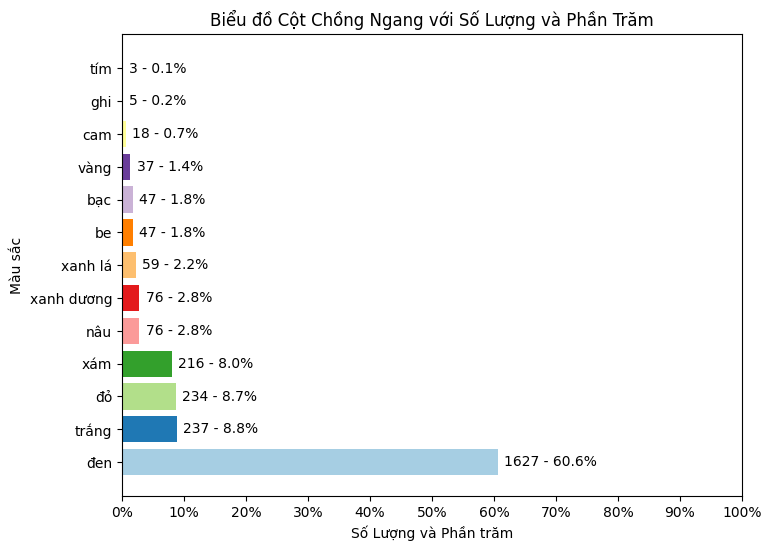

In [15]:
plot_bar_percent_count(df['Màu sắc'],'Màu sắc')

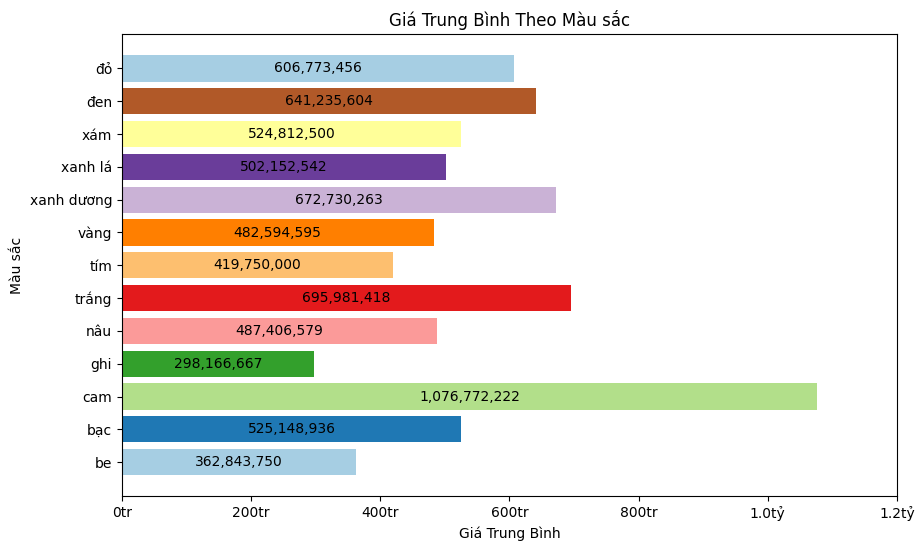

In [16]:
plot_bar_xprice(df,df['Màu sắc'],'Màu sắc')

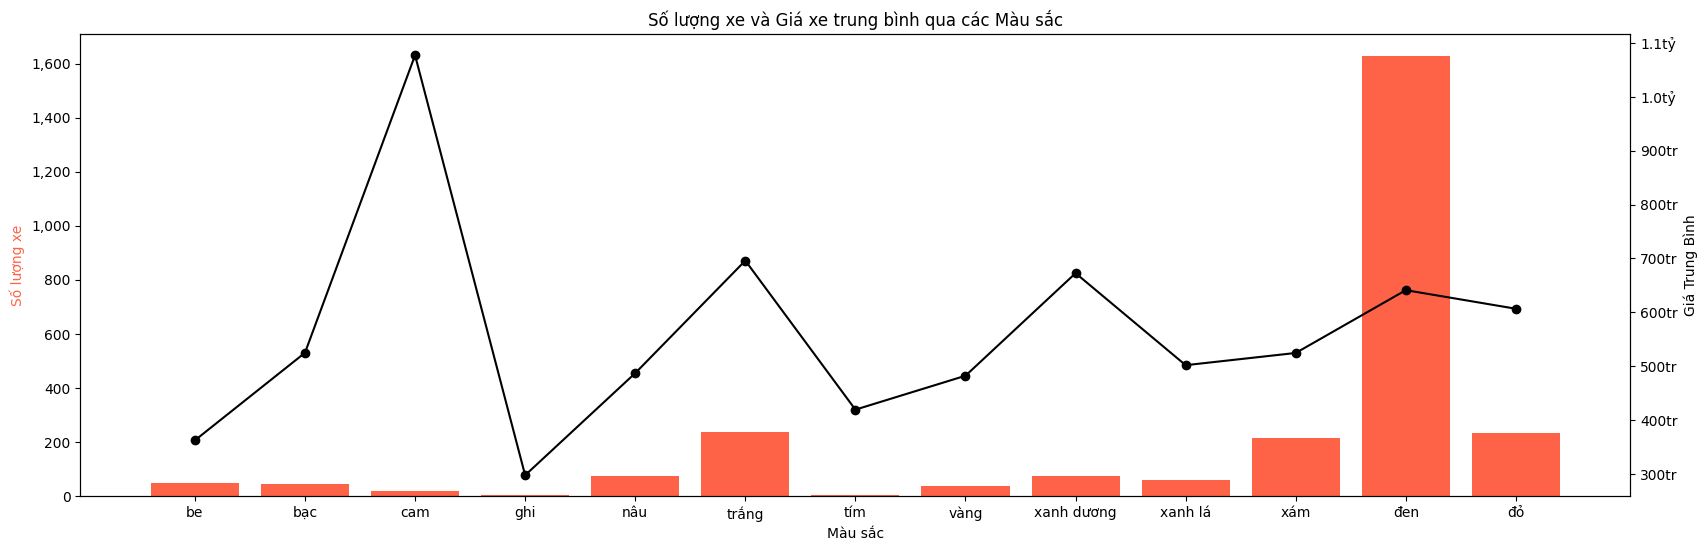

In [17]:
plot_price_count(df,df['Màu sắc'],'Màu sắc')

# **Chủ**

/var/folders/cq/ntgqkzfn65s54w230dxt1rkm0000gn/T/ipykernel_15798/1165052942.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_prices_chu = df_top_10.groupby('Chủ').mean()


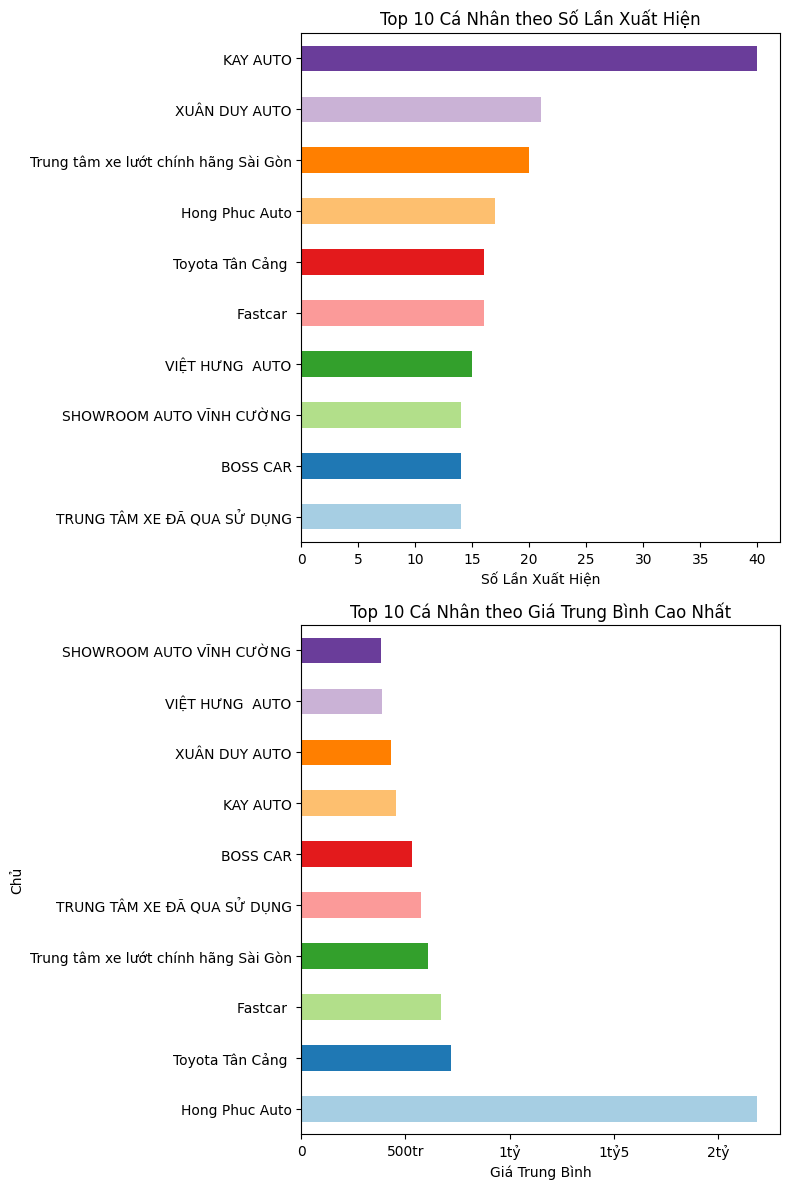

In [18]:
# Trích xuất phần tử đầu tiên của mỗi tên sau khi tách bởi dấu '-'
df['Chủ'] = df['Chủ'].apply(lambda x: x.split('-')[0])

# Lấy ra 10 cá nhân có số lần xuất hiện nhiều nhất
top_10_chu_counts = df['Chủ'].value_counts().nlargest(10).index

# Lọc DataFrame gốc để chỉ giữ lại 10 cá nhân hàng đầu
df_top_10 = df[df['Chủ'].isin(top_10_chu_counts)]

# Nhóm theo 'Chủ' và tính giá trung bình của 'Giá' cho mỗi nhóm
average_prices_chu = df_top_10.groupby('Chủ').mean()

# Vẽ biểu đồ cột cho 10 cá nhân hàng đầu theo số lần xuất hiện
plt.figure(figsize=(8, 12))  # Hai hàng, một cột

plt.subplot(2, 1, 1)  # Hai hàng, một cột, subplot đầu tiên
df['Chủ'].value_counts().nlargest(10).sort_values().plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top 10 Cá Nhân theo Số Lần Xuất Hiện')
plt.xlabel('Số Lần Xuất Hiện')

# Vẽ biểu đồ cột cho 10 cá nhân hàng đầu theo giá trung bình 'Giá' cao nhất
plt.subplot(2, 1, 2)  # Hai hàng, một cột, subplot thứ hai
average_prices_chu.sort_values(by='Giá', ascending=False)['Giá'].plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top 10 Cá Nhân theo Giá Trung Bình Cao Nhất')
plt.xlabel('Giá Trung Bình')

# Định dạng nhãn trục x dưới dạng tiền tệ
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))
plt.xticks([0, 500000000, 1000000000, 1500000000, 2000000000],
           ['0', '500tr', '1tỷ', '1tỷ5',  '2tỷ'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [19]:
# Lọc cho 'Đối tác' == 'Yes'
doi_tac_df = df[df['Đối tác'] == 'Yes']

# Đếm số lần xuất hiện của mỗi cá nhân
count_by_chu = doi_tac_df['Chủ'].value_counts()

# Đếm có bao nhiêu cá nhân có cùng một số lần xuất hiện
count_by_count = count_by_chu.value_counts().sort_index()

# Lặp qua các số lần xuất hiện và hiển thị thông tin
max_count = count_by_chu.max()

for count in range(1, max_count + 1):
    individuals_with_count = count_by_chu[count_by_chu == count].index

# Hiển thị số lượng cá nhân cho mỗi số lần xuất hiện
print('Số lượng người làm đối tác theo số lượng xe:')
print(count_by_count)


Số lượng người làm đối tác theo số lượng xe:
1    346
2     60
3     23
4     21
5      7
6      5
7      3
8      1
9      1
Name: Chủ, dtype: int64


In [20]:
# Lọc cho 'Đối tác' == 'No'
khong_doi_tac_df = df[df['Đối tác'] == 'No']

# Đếm số lần xuất hiện của mỗi cá nhân
count_by_chu = khong_doi_tac_df['Chủ'].value_counts()

# Đếm có bao nhiêu cá nhân có cùng một số lần xuất hiện
count_by_count = count_by_chu.value_counts().sort_index()

# Lặp qua các số lần xuất hiện và hiển thị thông tin
max_count = count_by_chu.max()

for count in range(1, max_count + 1):
    individuals_with_count = count_by_chu[count_by_chu == count].index
    # Xem danh sách những người bán X xe:
    # print(f'Chủ có {count} xe và không làm đối tác:')
    # for chu in individuals_with_count:
    #     print(f' - {chu}')
    # print('\n')

# Hiển thị số lượng cá nhân cho mỗi số lần xuất hiện
print('Số lượng người không làm đối tác theo số lượng xe:')
print(count_by_count)


Số lượng người không làm đối tác theo số lượng xe:
1     598
2     165
3      62
4      50
5      23
6      13
7      15
8      15
9       8
10      5
11      2
12      1
13      1
14      1
16      1
32      1
Name: Chủ, dtype: int64


# **Phân loại người bán**

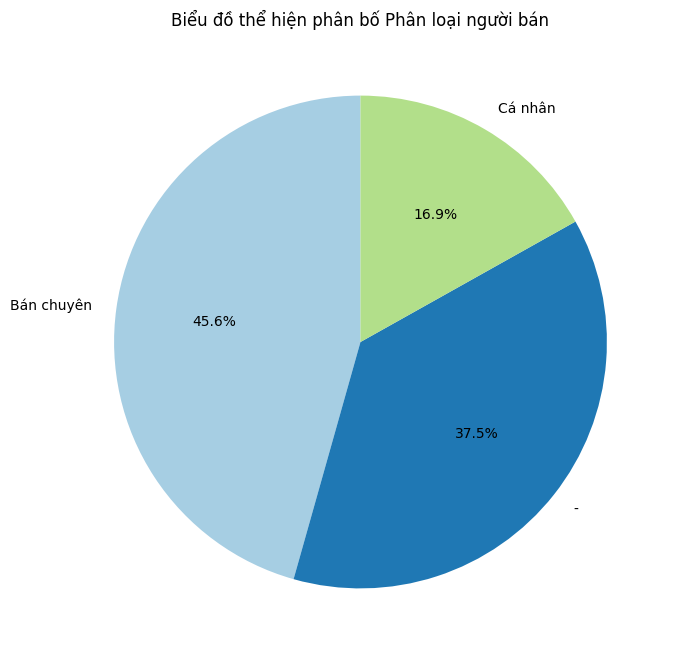

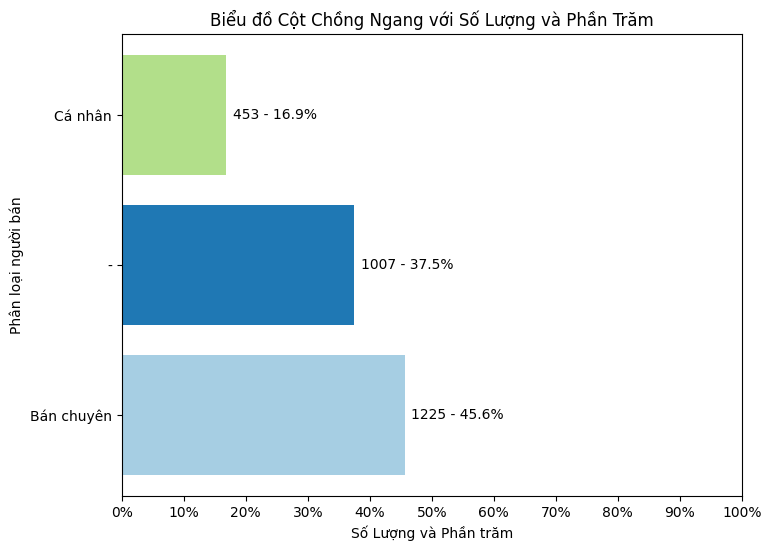

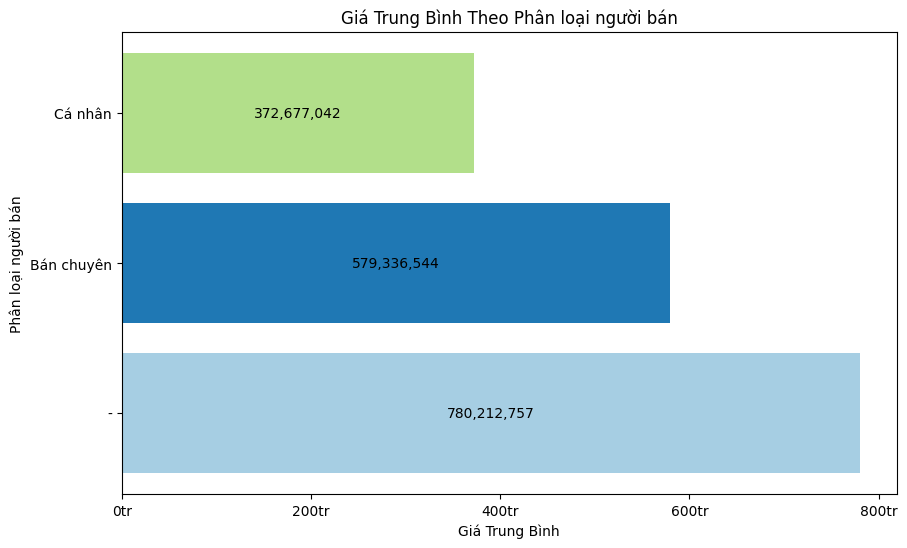

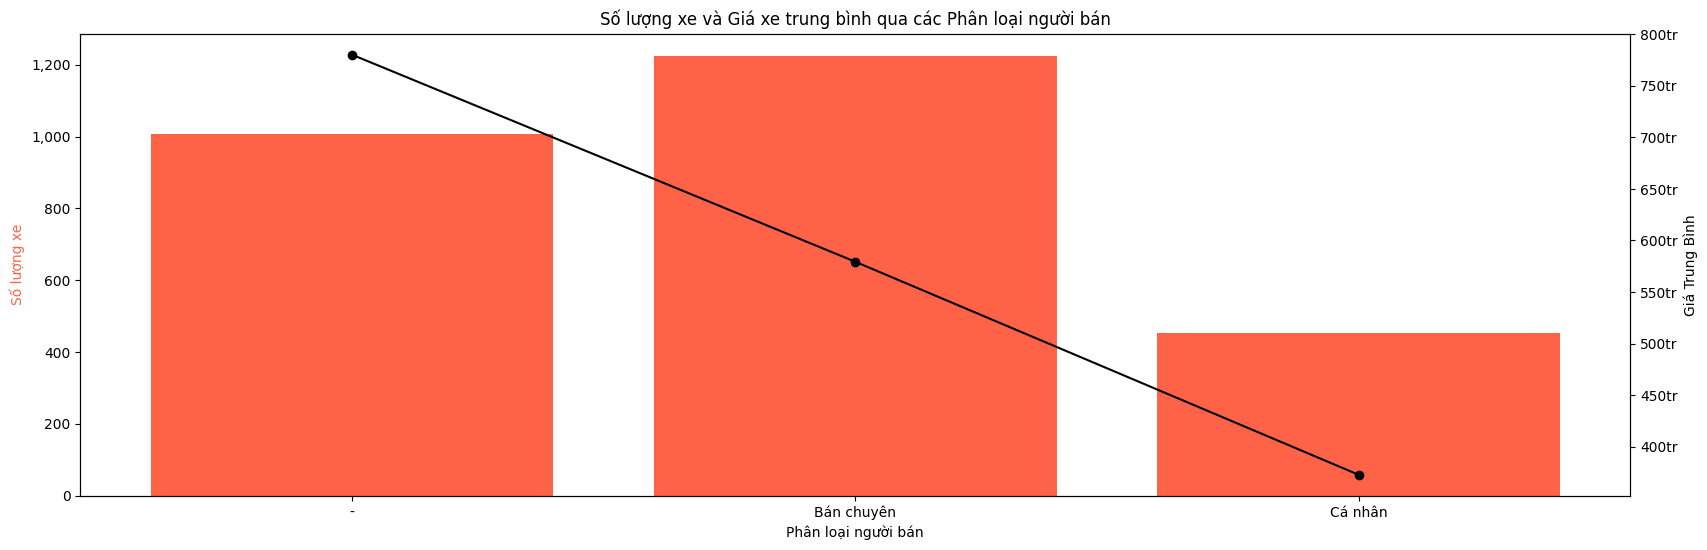

In [21]:
plot_few_value(df,df['Phân loại người bán'],'Phân loại người bán')

# **Hãng**

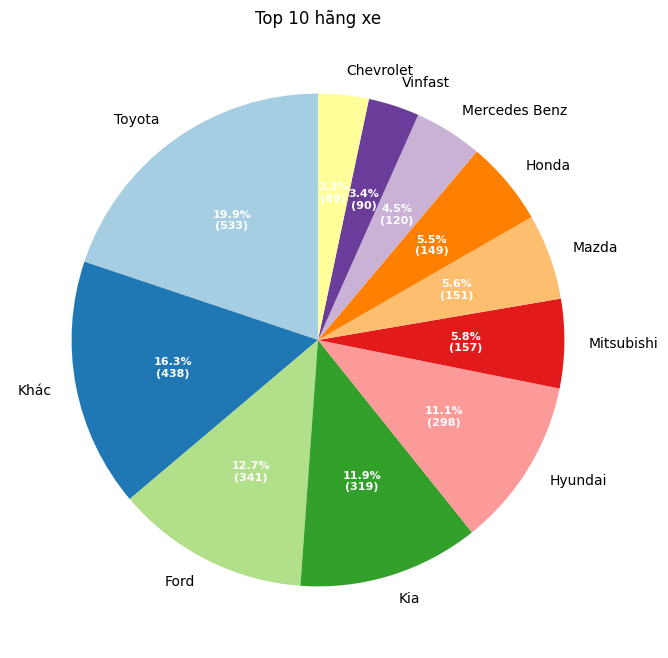

In [22]:
plot_circle_top10(df['Hãng'],'hãng xe')

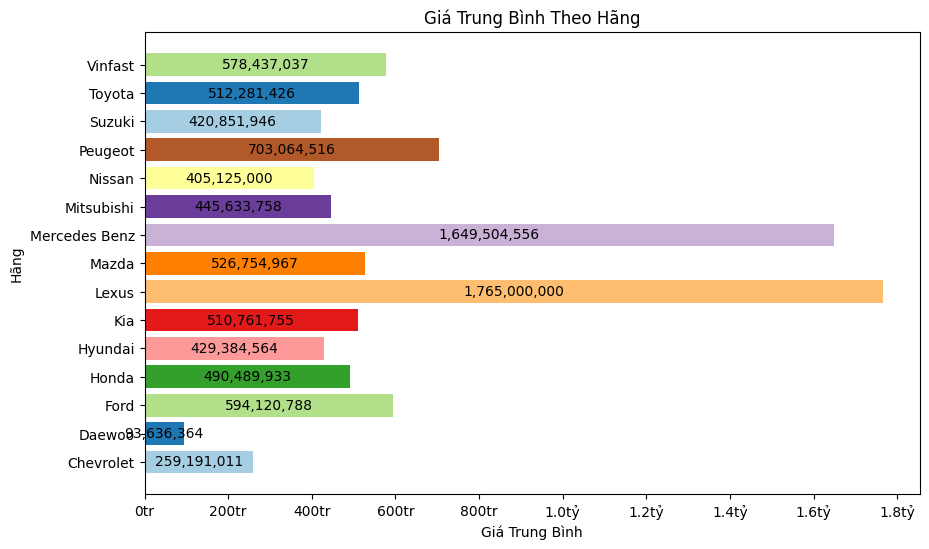

In [23]:
plot_bar_xprice(df,df['Hãng'],'Hãng')

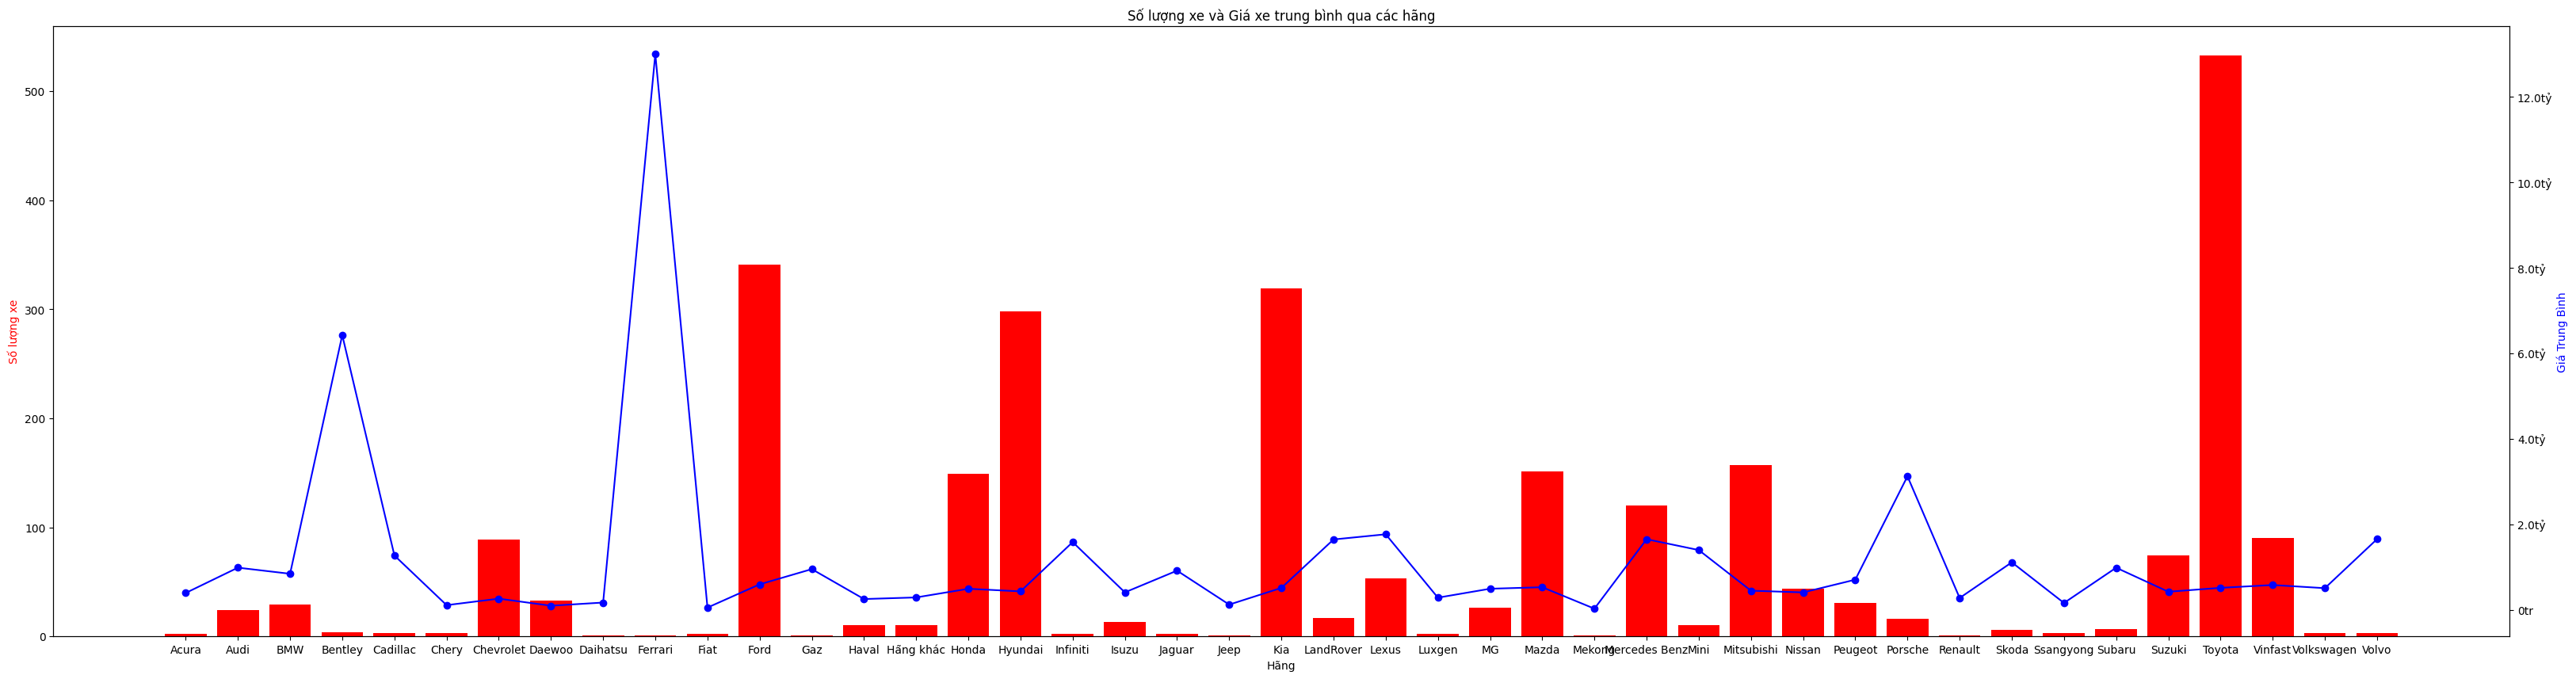

In [24]:
# Nhóm theo 'Hãng' và tính giá trung bình của 'Giá' cho mỗi nhóm
average_prices_by_year = df.groupby('Hãng')['Giá'].mean()

# Đếm số lượng xe trong mỗi năm
car_count_by_year = df['Hãng'].value_counts().sort_index()

# Tạo một hình vẽ và trục y chính
fig, ax1 = plt.subplots(figsize=(40, 10))

# Vẽ biểu đồ số lượng xe trên trục y chính
ax1.bar(car_count_by_year.index, car_count_by_year, color='r', zorder=2)
ax1.set_ylabel('Số lượng xe', color='r')

# Định dạng nhãn trục y dưới dạng số nguyên
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

# Tạo một trục y phụ
ax2 = ax1.twinx()

# Vẽ biểu đồ giá trung bình trên trục y phụ
ax2.plot(average_prices_by_year.index, average_prices_by_year, marker='o', linestyle='-', color='b', zorder=1)
ax2.set_ylabel('Giá Trung Bình', color='b')

# Định dạng nhãn trục y phụ dưới dạng tiền tệ
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

ax1.set_title('Số lượng xe và Giá xe trung bình qua các hãng')
ax1.set_xlabel('Hãng')

plt.show()


# **Năm sản xuất**

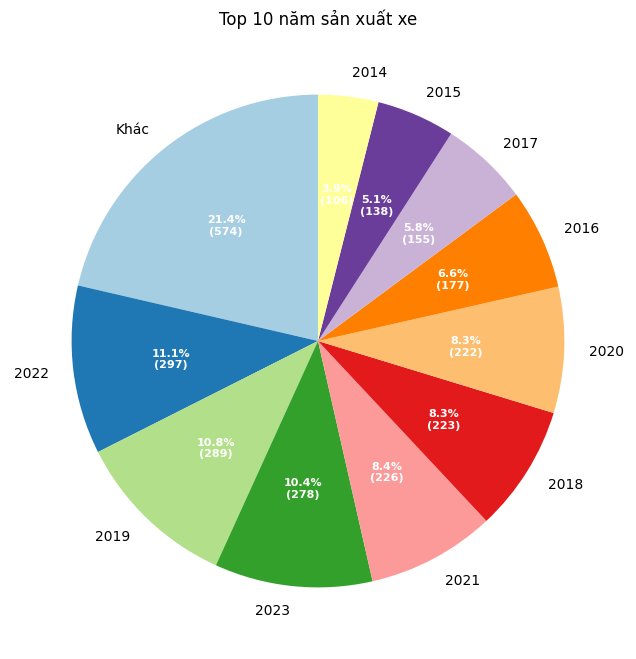

In [25]:
plot_circle_top10(df['Năm sản xuất'],'năm sản xuất xe')

In [26]:
df['Năm sản xuất'] = df['Năm sản xuất'].replace('trước năm 1980', '1980')

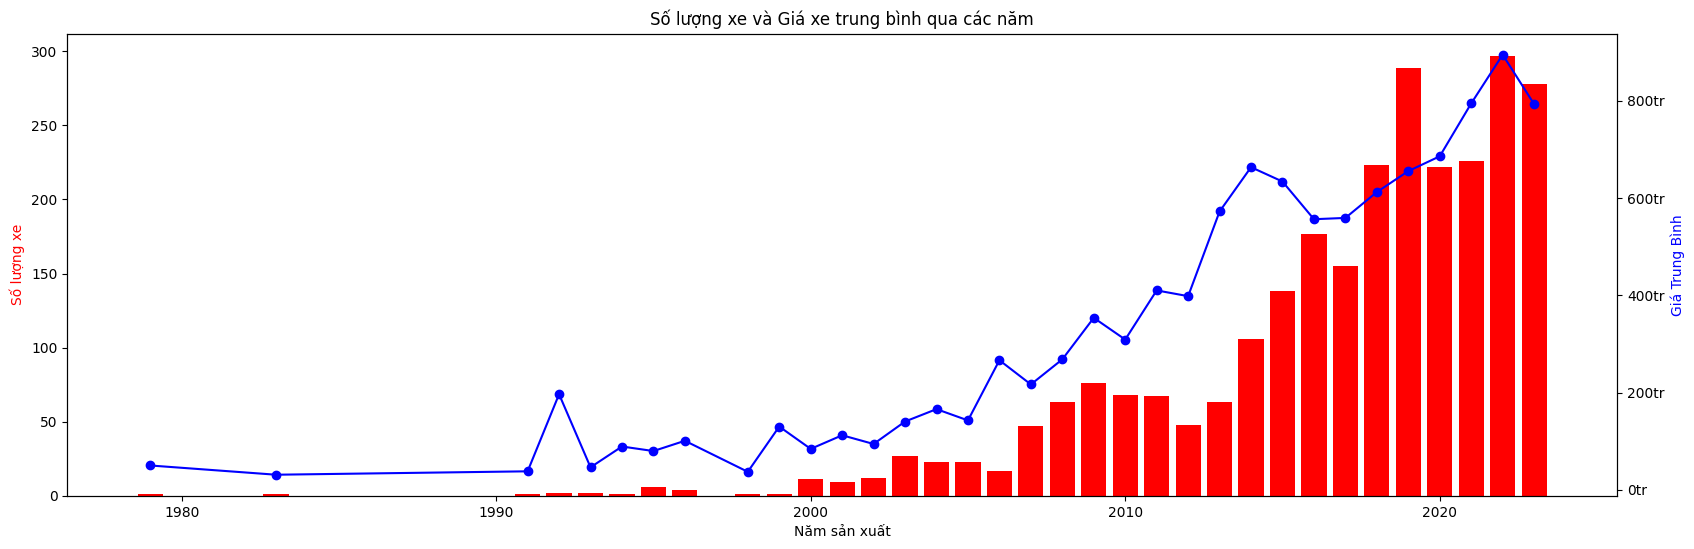

In [27]:
# Nhóm theo 'Năm sản xuất' và tính giá trung bình của 'Giá' cho mỗi nhóm
average_prices_by_year = df.groupby('Năm sản xuất')['Giá'].mean()

# Đếm số lượng xe trong mỗi năm
car_count_by_year = df['Năm sản xuất'].value_counts().sort_index()

# Tạo một hình vẽ và trục y chính
fig, ax1 = plt.subplots(figsize=(20, 6))

# Vẽ biểu đồ số lượng xe trên trục y chính
ax1.bar(car_count_by_year.index, car_count_by_year, color='r', zorder=2)
ax1.set_ylabel('Số lượng xe', color='r')

# Định dạng nhãn trục y dưới dạng số nguyên
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}".format(y)))

# Tạo một trục y phụ
ax2 = ax1.twinx()

# Vẽ biểu đồ giá trung bình trên trục y phụ
ax2.plot(average_prices_by_year.index, average_prices_by_year, marker='o', linestyle='-', color='b', zorder=1)
ax2.set_ylabel('Giá Trung Bình', color='b')

# Định dạng nhãn trục y phụ dưới dạng tiền tệ
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,.0f}tr".format(y / 1000000) if y < 1000000000 else "{:,.1f}tỷ".format(y / 1000000000)))

ax1.set_title('Số lượng xe và Giá xe trung bình qua các năm')
ax1.set_xlabel('Năm sản xuất')

plt.show()

# **Tình trạng**

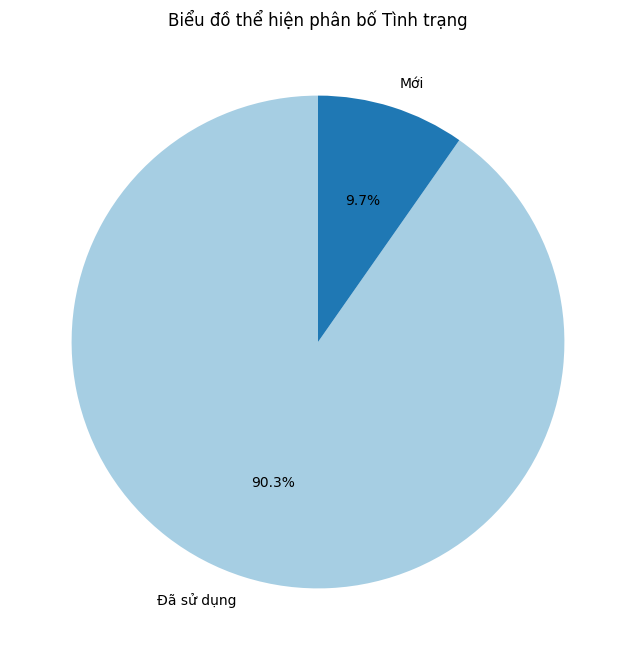

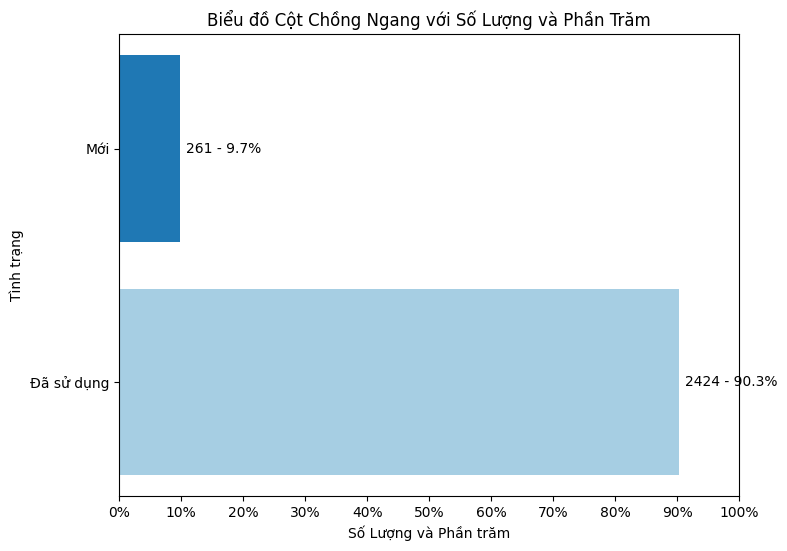

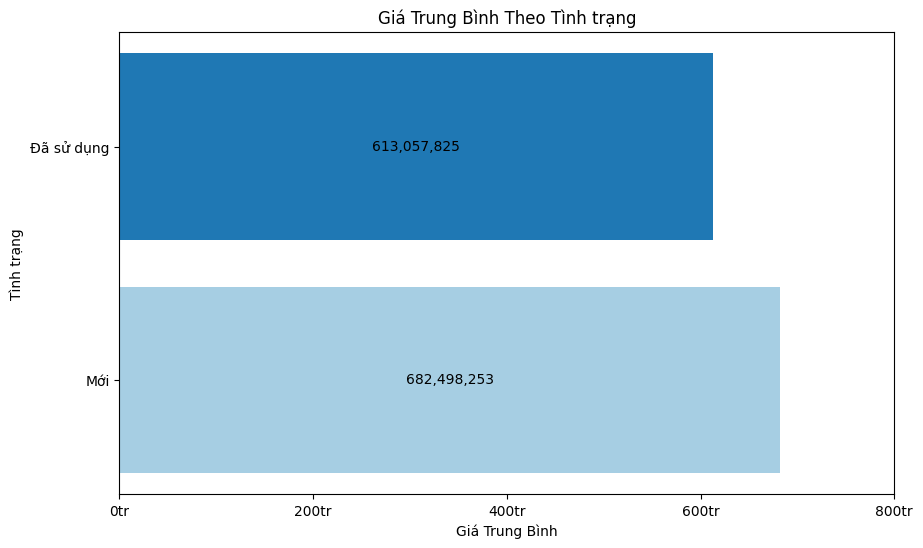

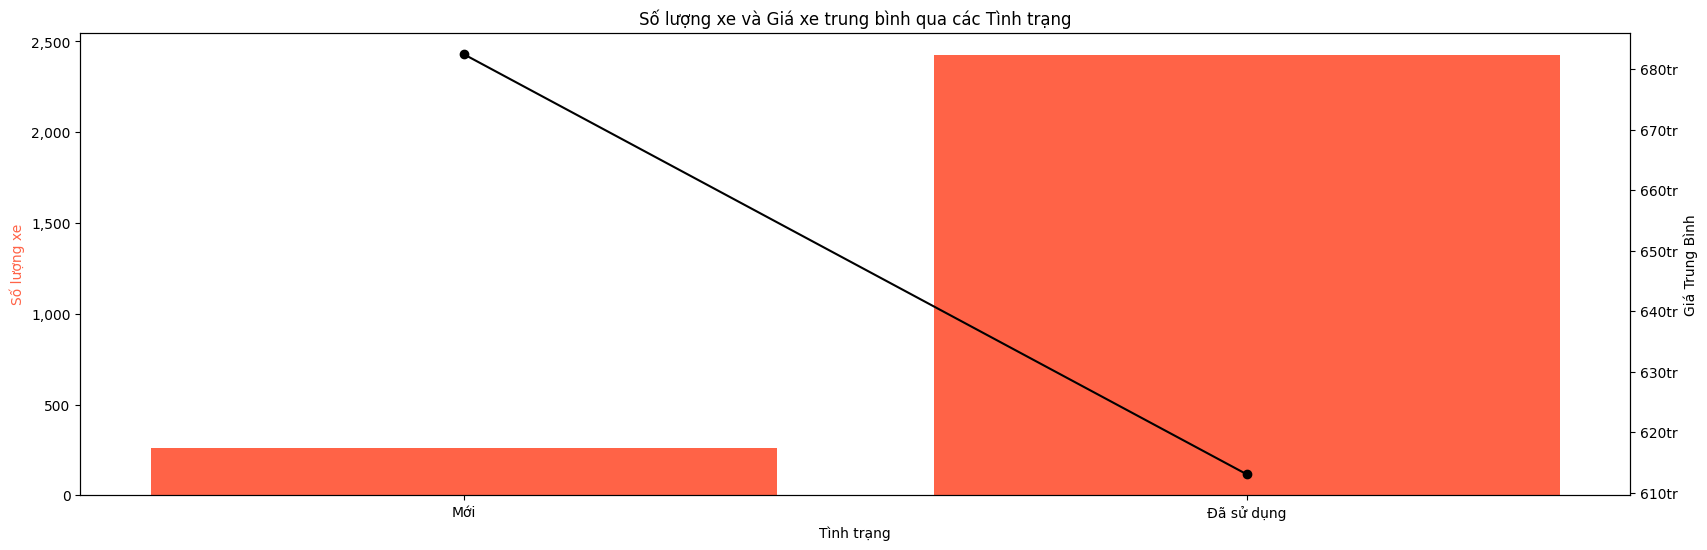

In [28]:
plot_few_value(df,df['Tình trạng'],'Tình trạng')

Text(0.0, 1.0, 'Tỉ lệ % xe mới xe cũ qua các hãng')

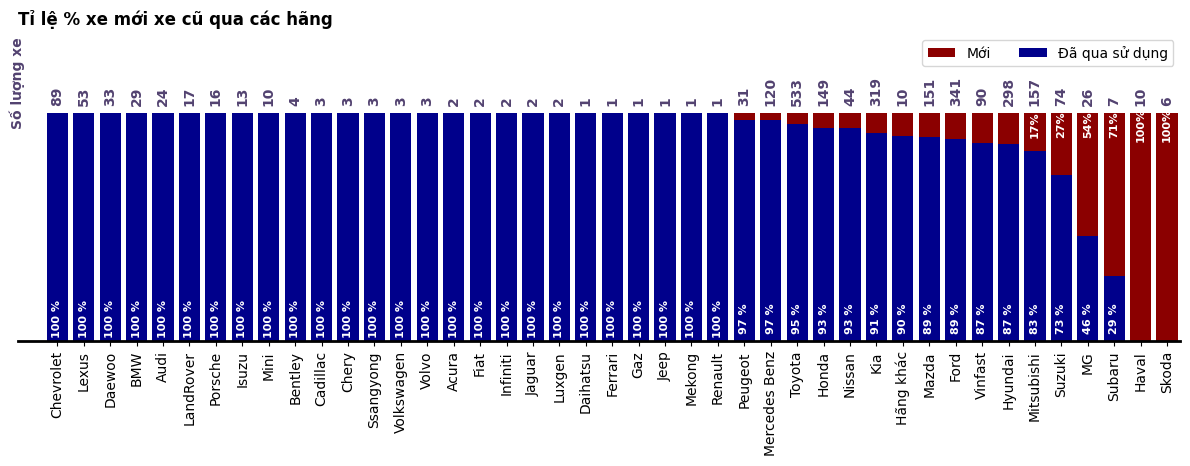

In [29]:
df['Tình trạng'] = df['Tình trạng'].map({'Đã sử dụng': 1, 'Mới': 0})
df['Tình trạng'].astype(int)
pct_tinhtrangxe_by_hang = df.groupby('Hãng')['Tình trạng'].mean().sort_values(ascending=False)
tong_hangxe = df.groupby('Hãng')['Hãng'].count()

df_tt = (
    pd.DataFrame({'pct_tinhtrangxe': pct_tinhtrangxe_by_hang,
                  'total_cars_on_sale': tong_hangxe})
    .sort_values(by=['pct_tinhtrangxe', 'total_cars_on_sale'], ascending=False)
)
fig, ax = plt.subplots(figsize=(15, 4))

ax.bar(df_tt.index, [100]*df_tt.shape[0], color='darkred', label='Mới')
pct_bars = ax.bar(df_tt.index, 100*df_tt['pct_tinhtrangxe'], color='darkblue', label='Đã qua sử dụng')
ax.legend(loc='upper right', ncols =2)

ax.set_yticks([])
ax.set_ylim(0, 135)
ax.set_xlim(-1.5, df_tt.shape[0]-0.5)
ax.tick_params(axis='x', rotation=90)

for spin in ax.spines:
    if spin in ['bottom']:
        ax.spines[spin].set(lw=2)
    else:
        ax.spines[spin].set_visible(False)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda yi, li: f'{yi:2.0f}%'))

for bar, manufacturer in zip(pct_bars, df_tt.index):
    pct = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    if pct >= 15:
        ax.annotate(text=f'{pct:2.0f} %', xy=(x, 10), rotation=90,
                    ha='center', va='center', color='white', fontweight='bold',
                    fontsize=8)
    if pct<85:
        ax.annotate(text=f'{100-pct:2.0f}%', xy=(x, 95), rotation=90,
                    ha='center', va='center', color='white', fontweight='bold',
                    fontsize=8)

    total_cars = df_tt.loc[manufacturer, 'total_cars_on_sale']
    ax.annotate(text=f'{total_cars}', xy=(x, 103), ha='center', va='bottom',
               rotation=90, fontweight='bold', color='#524270')

ax.annotate(text='Số lượng xe', xy=(-1.5, 93), rotation=90, ha='center',
            va='bottom', fontweight='bold', color='#524270')

ax.set_title('Tỉ lệ % xe mới xe cũ qua các hãng', loc='left',
              fontweight='bold')

# **Hộp số**

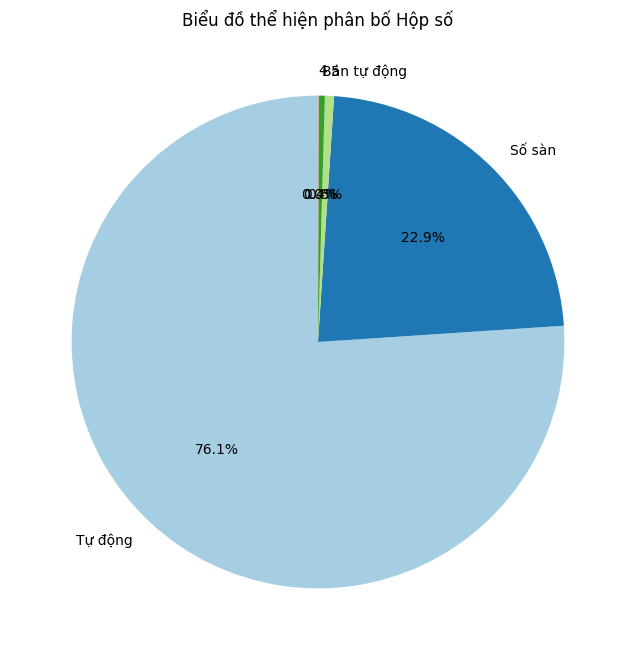

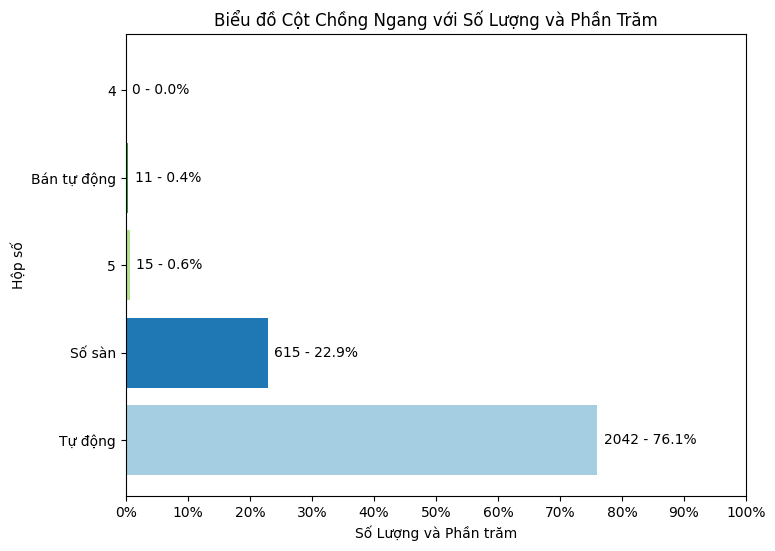

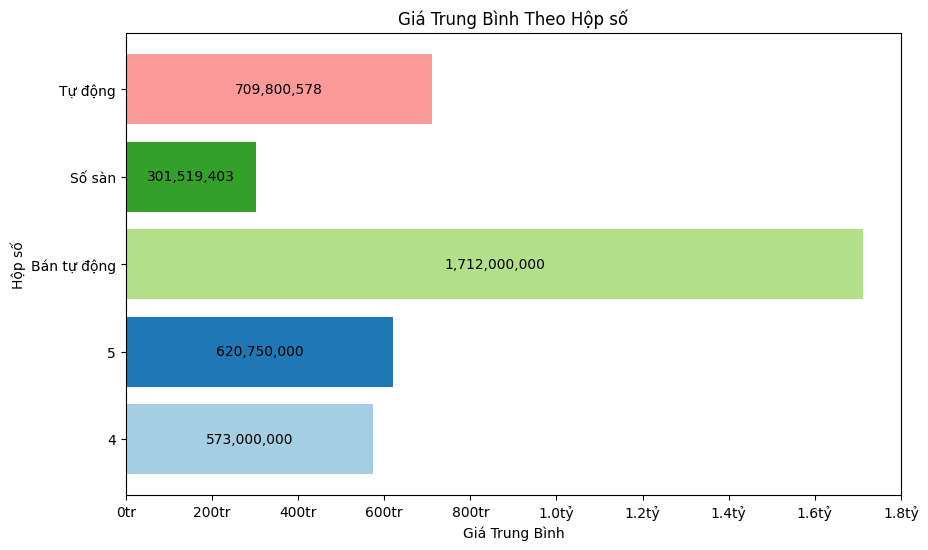

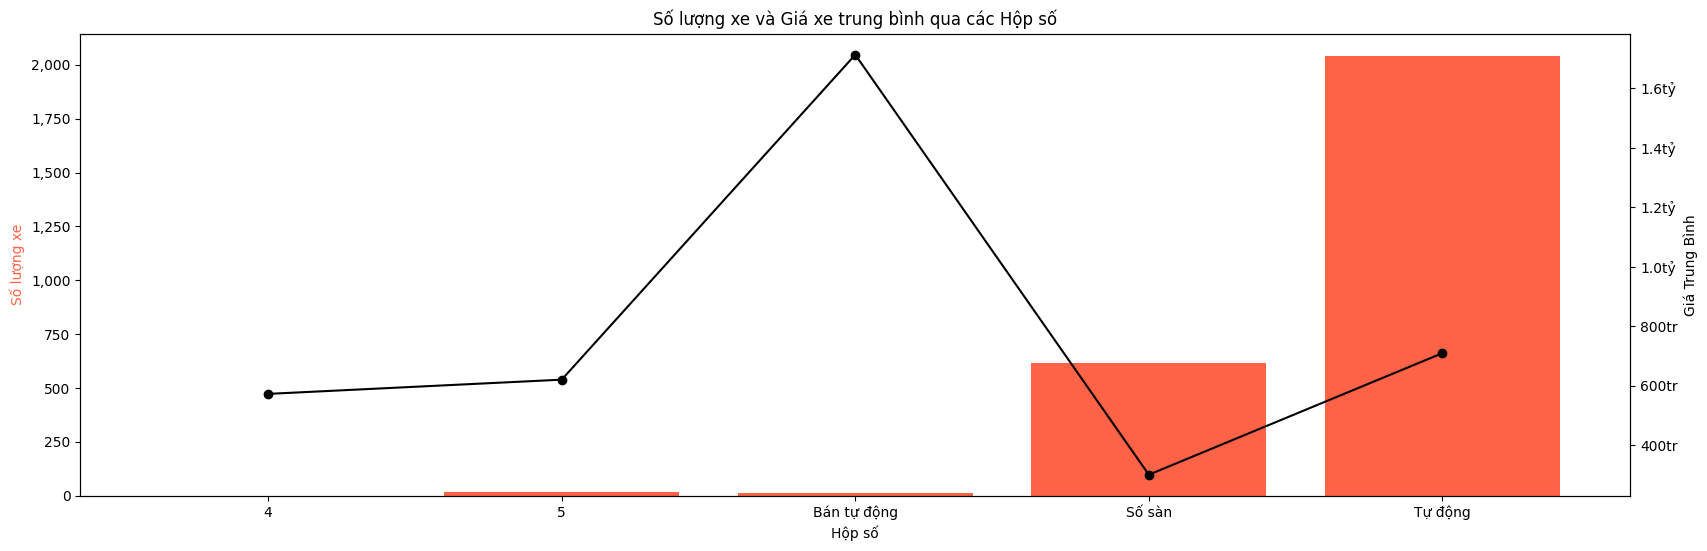

In [30]:
plot_few_value(df,df['Hộp số'],'Hộp số')

# **Nhiên liệu**

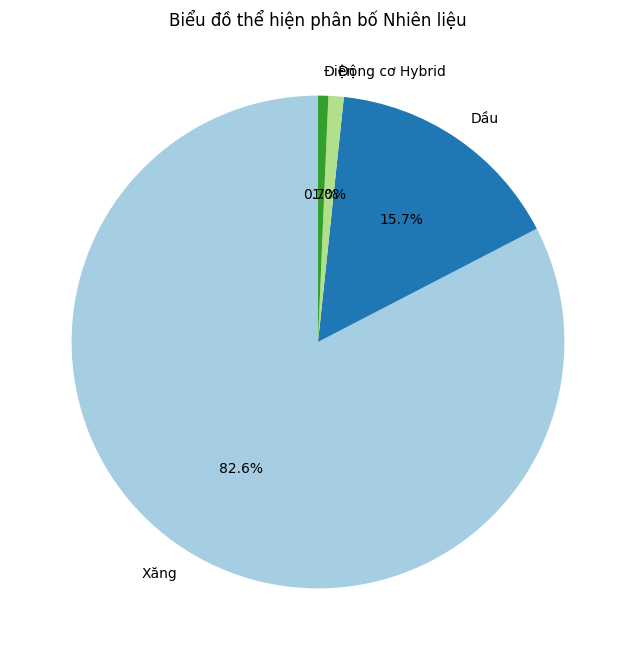

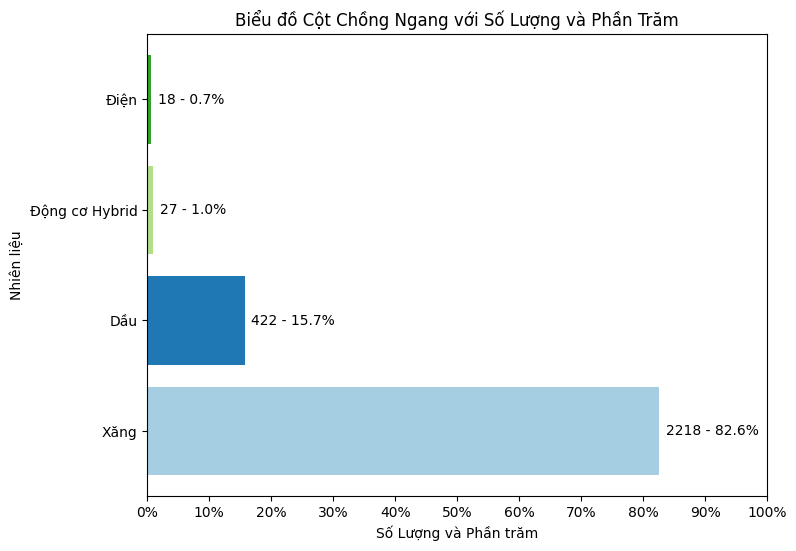

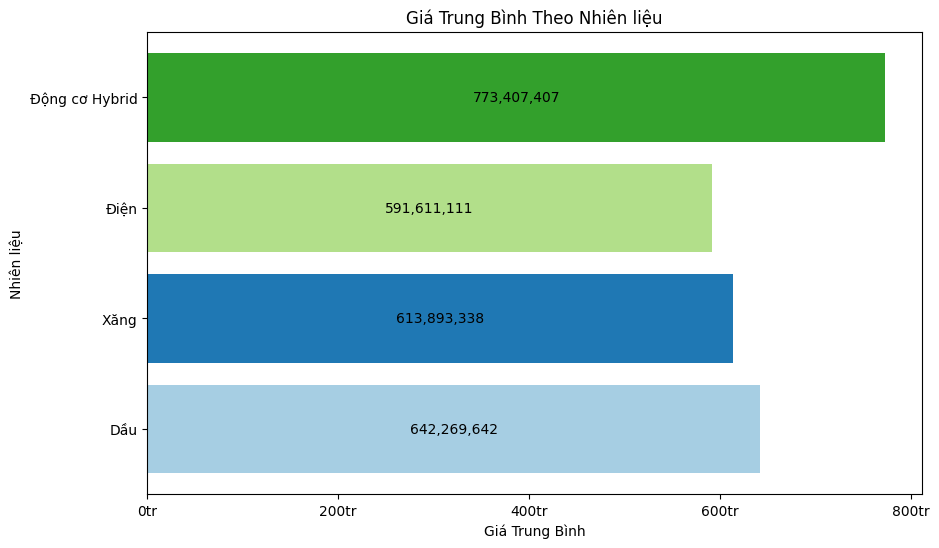

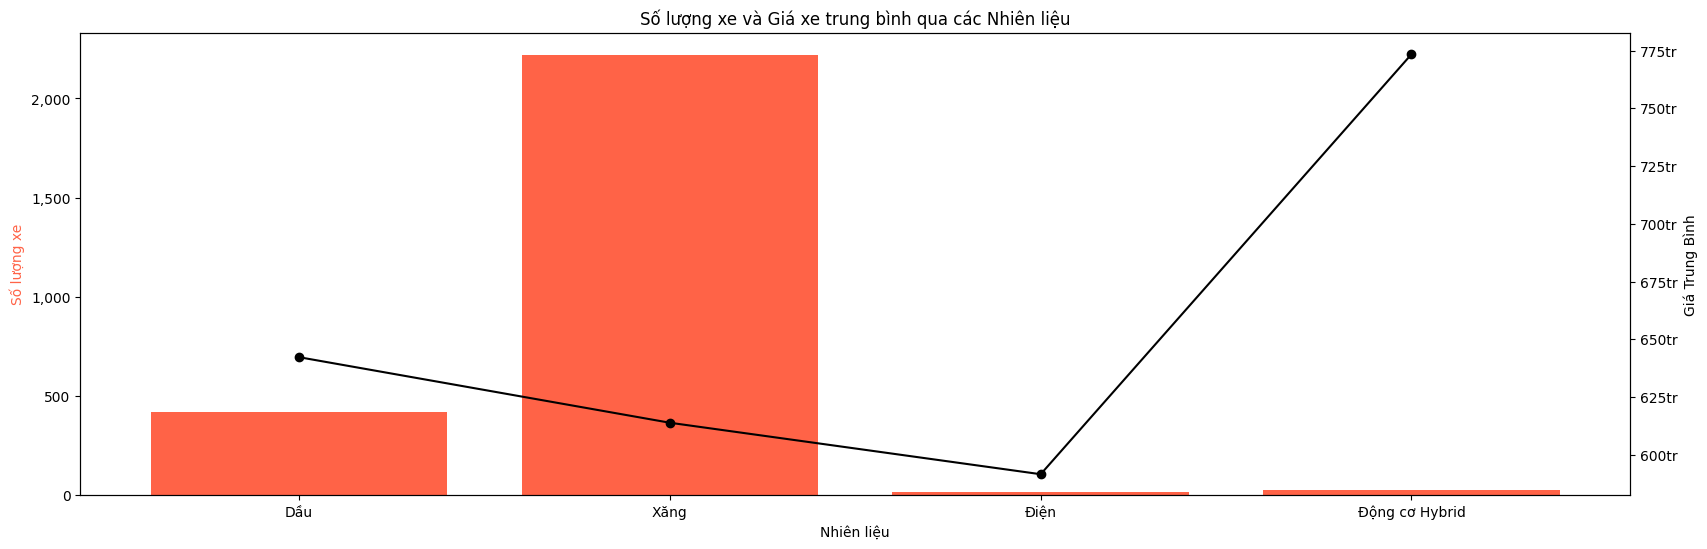

In [31]:
plot_few_value(df,df['Nhiên liệu'],'Nhiên liệu')

# **Kiểu dáng**

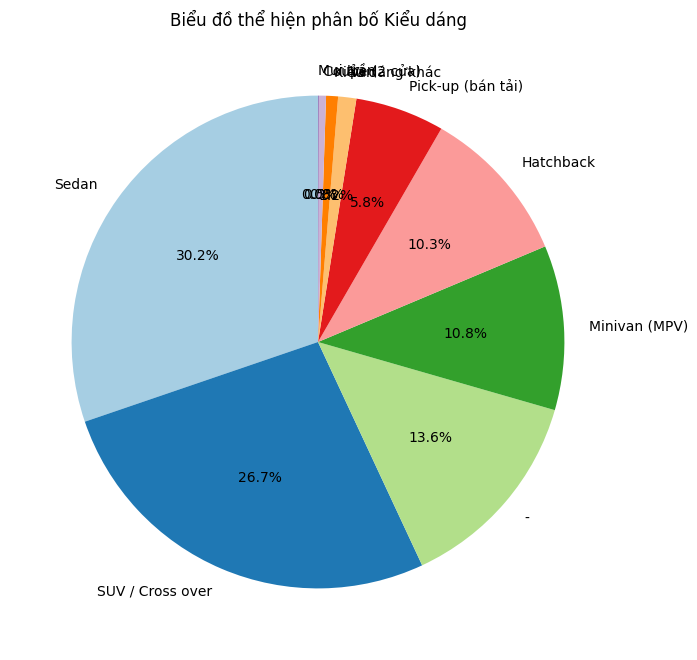

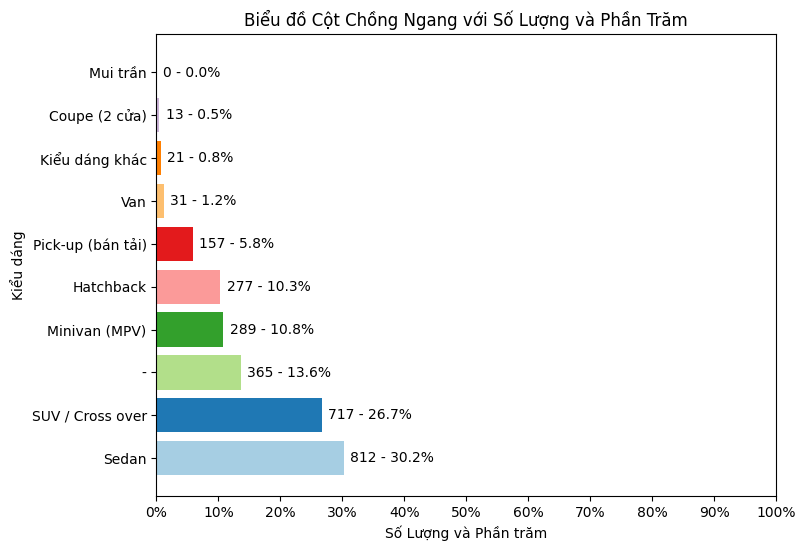

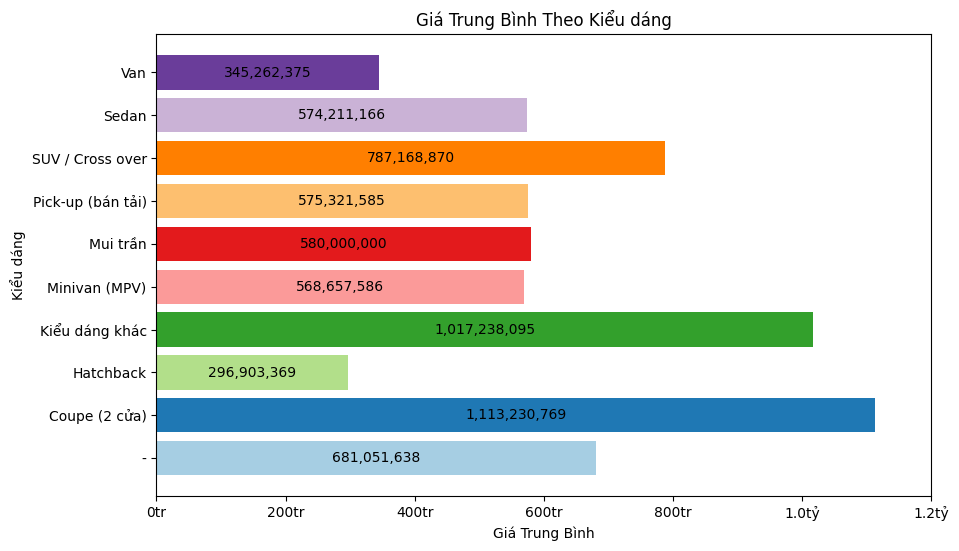

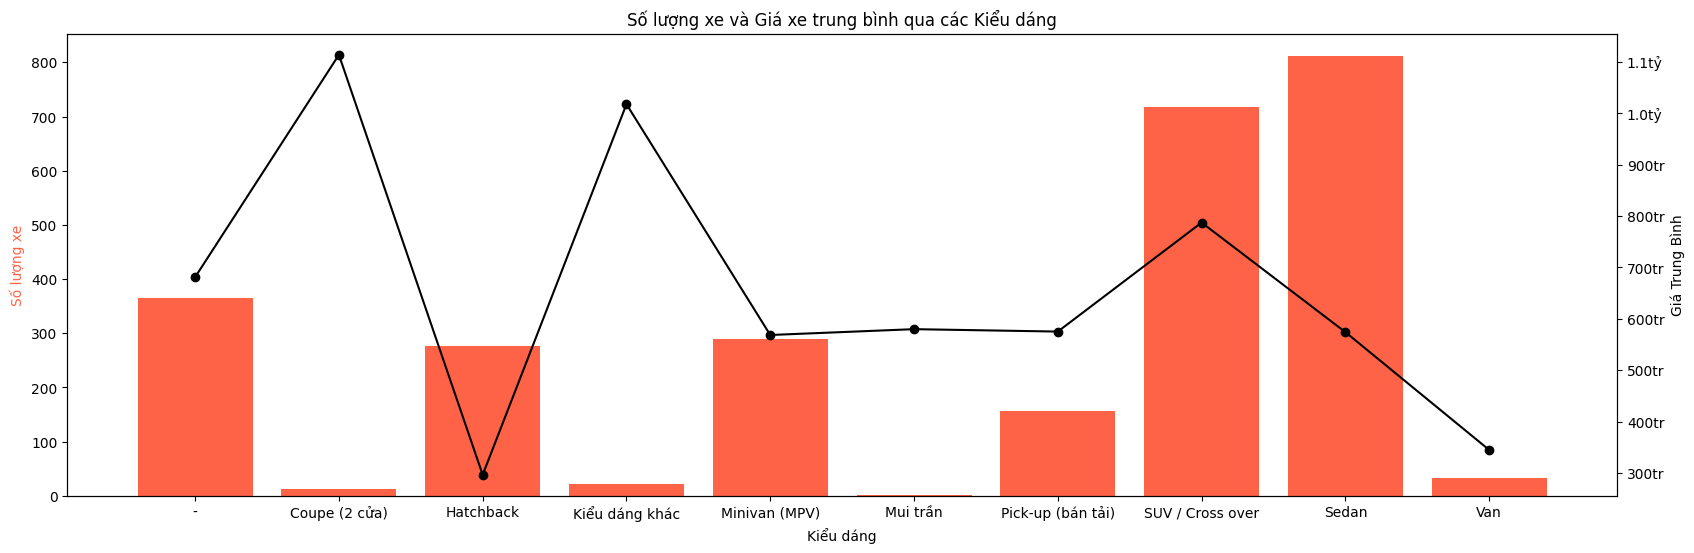

In [32]:
plot_few_value(df,df['Kiểu dáng'],'Kiểu dáng')

# **Số chỗ**

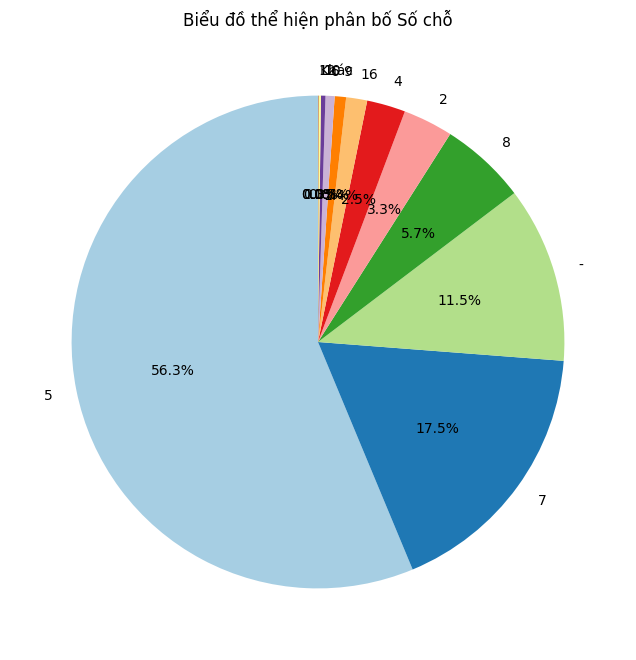

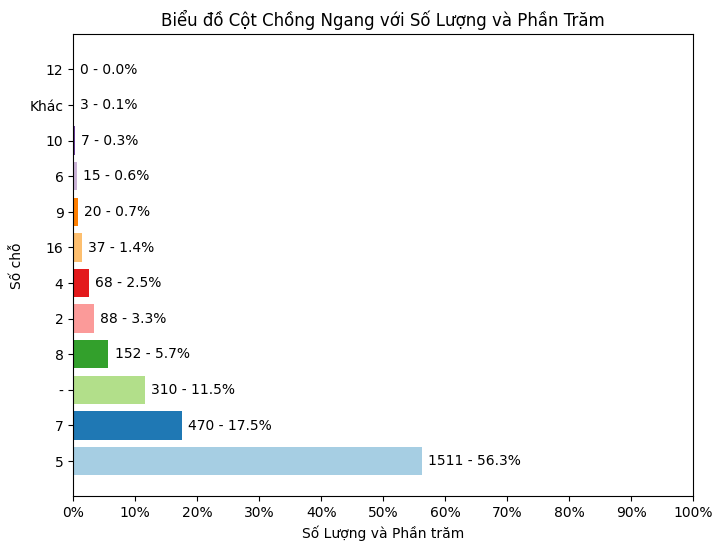

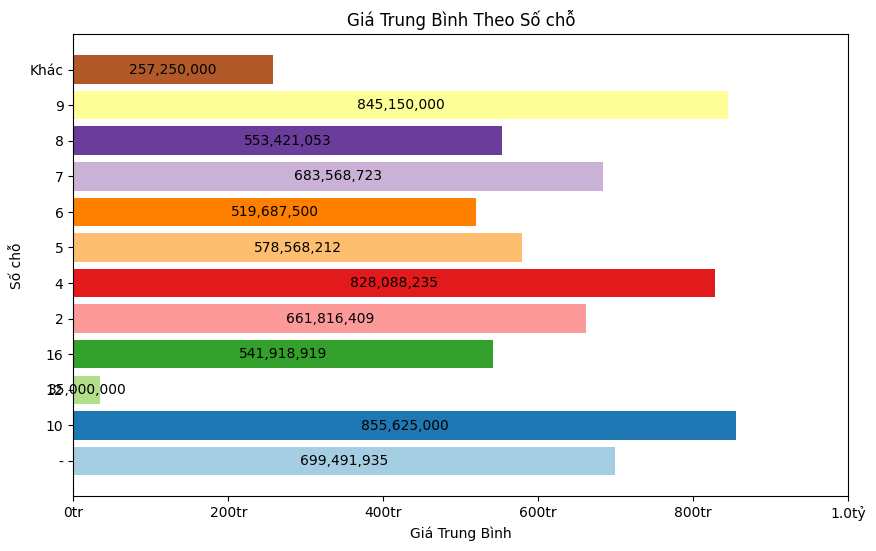

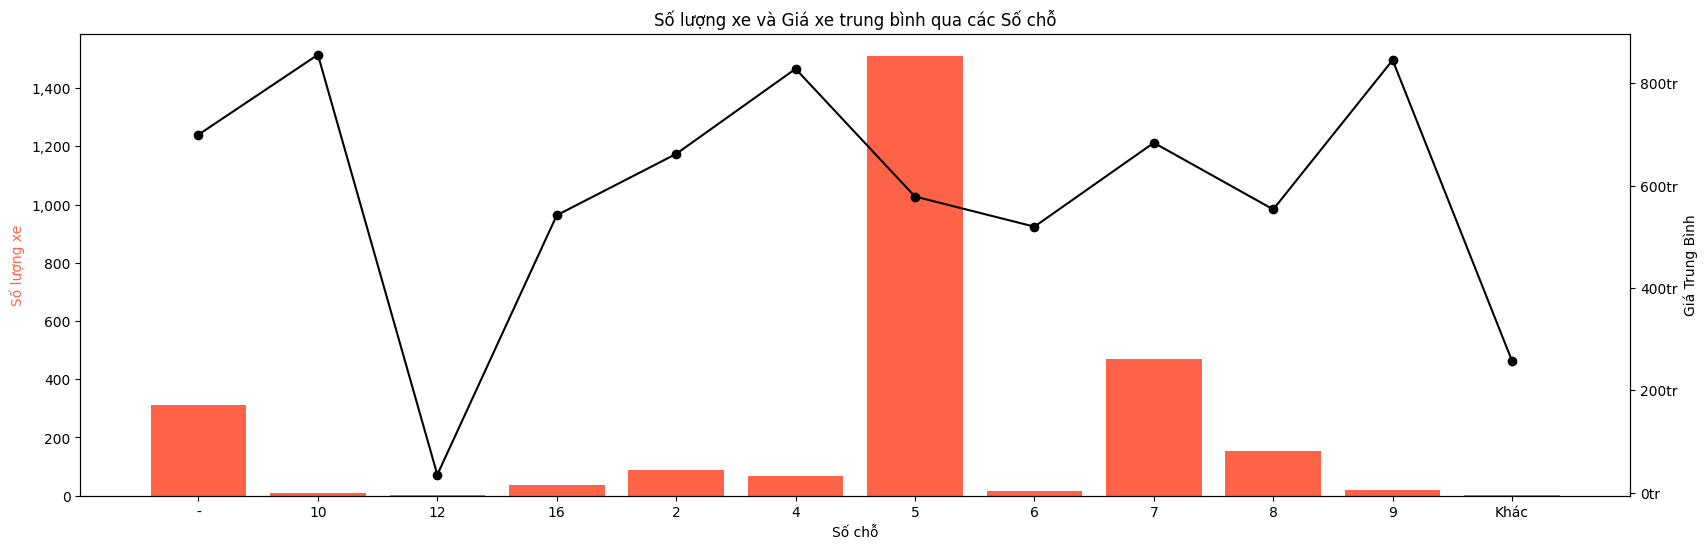

In [33]:
plot_few_value(df,df['Số chỗ'],'Số chỗ')

# **Xuất xứ**

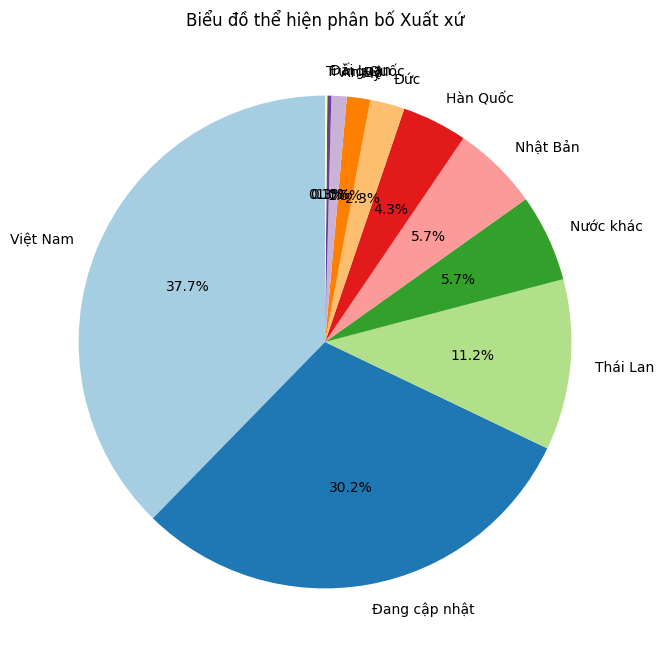

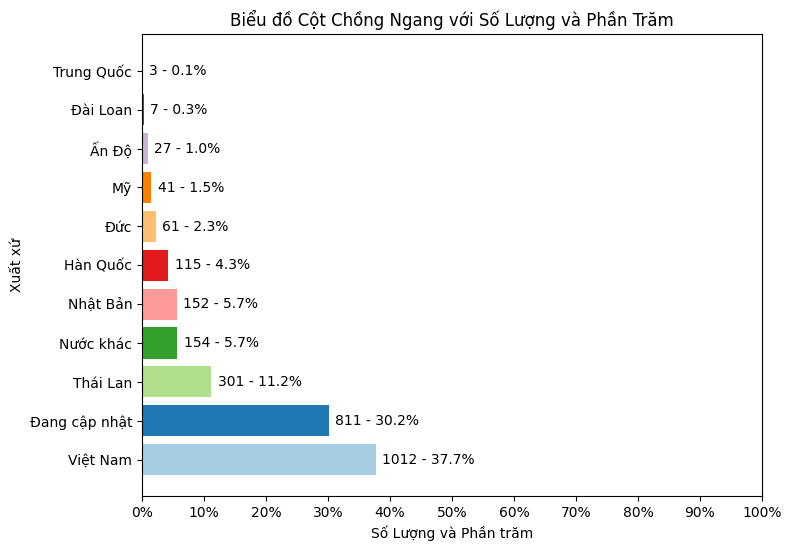

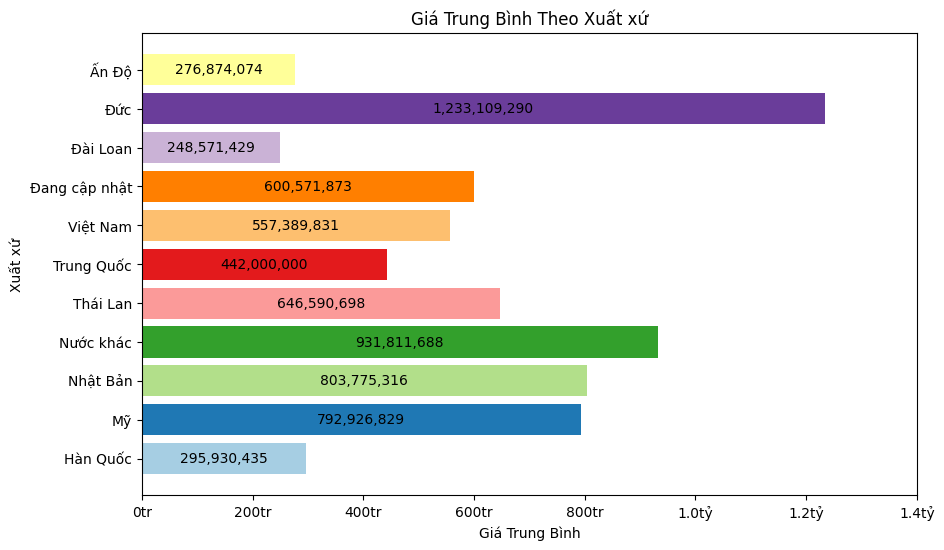

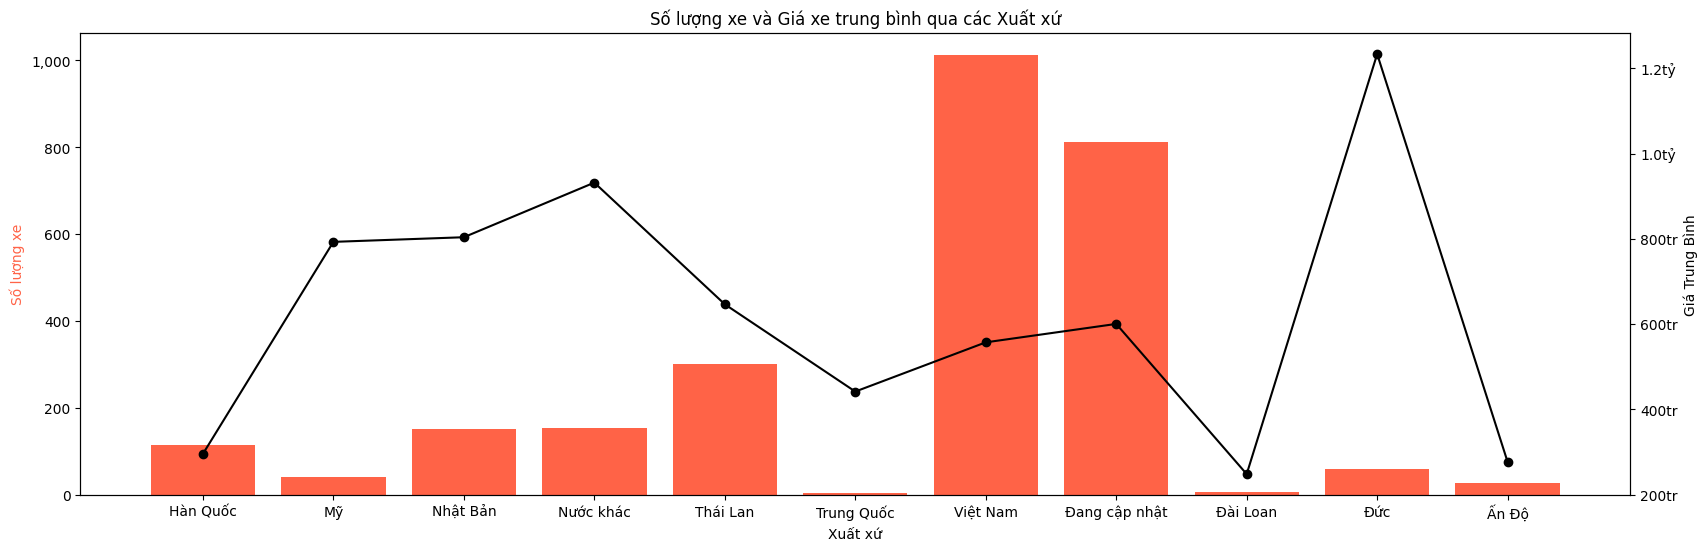

In [34]:
plot_few_value(df,df['Xuất xứ'],'Xuất xứ')